In [16]:
import pandas

In [17]:
features = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash",
    "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols",
    "Proanthocyanins", "Color intensity", "Hue",
    "OD280/OD315 of diluted wines", "Proline"]
target = 'Class'

# Load a Data Set

In hindsight this might have been a poor choice.

In [18]:
df = pandas.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=[target] + features)

In [19]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Alcohol Content per Class')

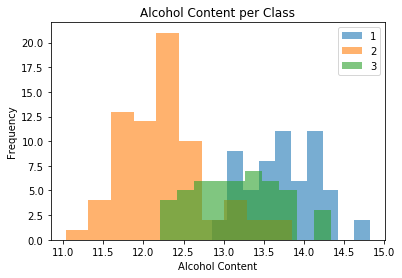

In [21]:
for c, d in df.groupby('Class'):
    d.Alcohol.plot.hist(label=c, alpha=0.6)
plt.legend()
plt.xlabel('Alcohol Content')
plt.title('Alcohol Content per Class')

# Find Feature Importance by Achieved Accuracy Score

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [23]:
train_data, test_data = train_test_split(df, test_size=0.2)

Note that we can specify values for a complete set $\{ f(x) \mid x \in X\}$ with the syntax  `[f[i] for x in X]` as shown below.

In [24]:
models = [KNeighborsClassifier(n_neighbors=5).fit(train_data[[f]], train_data[target]) for f in features]
scores = [accuracy_score(test_data[target], m.predict(test_data[[f]])) for m, f in zip(models, features)]

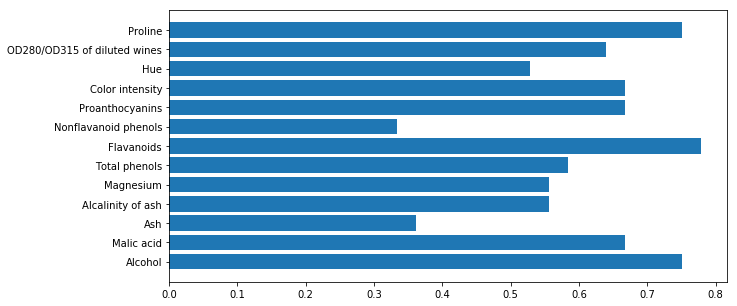

In [25]:
plt.barh(range(len(features)), scores)
plt.yticks(range(len(features)), features)
plt.gcf().set_size_inches(10, 5)
None

In [26]:
train_scores = [accuracy_score(train_data[target], m.predict(train_data[[f]])) for m, f in zip(models, features)]

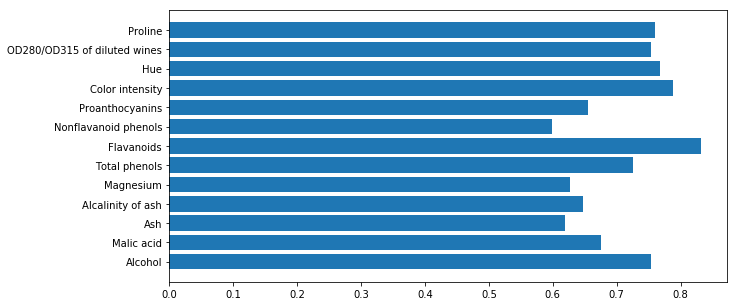

In [27]:
plt.barh(range(len(features)), train_scores)
plt.yticks(range(len(features)), features)
plt.gcf().set_size_inches(10, 5)
None

# Which k Should You Choose?

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
df_scaled = pandas.DataFrame(StandardScaler().fit_transform(df[features]), columns=features)
df_scaled[target] = df[target]

In [30]:
train_data_s, test_data_s = train_test_split(df_scaled, test_size=0.2)

In [31]:
N, _ = train_data_s.shape

In [32]:
ks = range(1, N+1)
models = [KNeighborsClassifier(n_neighbors=k).fit(train_data_s[features], train_data_s[target]) for k in ks]
scores = [accuracy_score(test_data_s[target], m.predict(test_data_s[features])) for m in models]

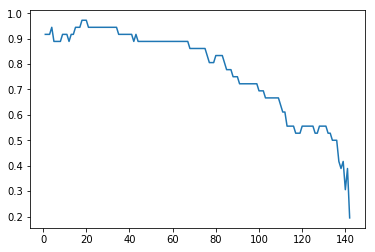

In [33]:
plt.plot(ks, scores)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
neighbor_ks = range(1, 100)
untrained_models = [KNeighborsClassifier(n_neighbors=k) for k in neighbor_ks]

In [36]:
k_fold_scores = [cross_val_score(estimator=m, X=df_scaled[features], y=df_scaled[target], cv=10) for m in untrained_models]

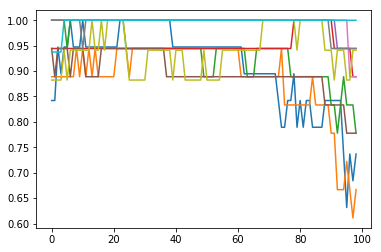

In [37]:
plt.plot(k_fold_scores)

None

<ErrorbarContainer object of 3 artists>

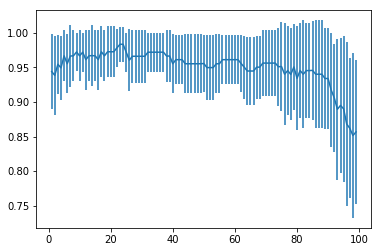

In [38]:

plt.errorbar(neighbor_ks, [s.mean() for s in k_fold_scores], yerr=[s.std() for s in k_fold_scores])

In [44]:
train_data_s
n_samples = 1
for t=range(n_samples):
    bootstrap_sample = sklearn.utils.resample(train_data_s, replace=True, n_samples = 10, random_state = 1)


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
48,1.358028,-0.283974,0.122392,-0.208681,0.228785,0.728881,0.894264,-0.337251,1.382572,0.493956,0.493797,0.195361,0.997086,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
75,-1.656018,-0.409647,-1.632171,-1.049479,-0.192495,-1.097777,-0.461091,-0.176095,-0.772492,-0.544212,1.195772,-0.666229,-1.015514,2
37,0.061000,-0.616110,0.670693,-0.448909,-0.122282,0.248181,0.402320,-0.578985,-0.264388,-0.349555,0.713164,-0.143625,1.140389,1
106,-0.927212,-0.544297,-0.901103,-0.148624,-1.386122,-1.033684,0.000733,0.065639,0.068508,-0.717240,0.186684,0.788587,-0.754385,2
67,-0.778980,-1.046988,-1.632171,0.031547,-1.526548,-0.296611,-0.029386,-0.740141,-0.965221,-0.163550,0.713164,1.226445,-0.754385,2
124,-1.396613,1.771674,0.085839,0.451946,-1.245695,0.905137,1.004700,-1.223610,2.311176,-0.976782,-0.910151,1.452436,-1.168369,2
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442,1
15,0.777454,-0.472483,1.218995,-0.689137,0.860705,0.889114,0.884224,-0.498407,-0.229346,0.969783,1.415139,0.378979,1.793210,1
145,0.196879,1.107404,-0.791443,0.451946,0.158572,-1.274034,-1.485138,0.549108,-0.509679,-0.457698,-1.568252,-1.315952,0.264653,3
